# Análise Preditiva de Óbitos Por Doenças Crônicas não Transmitíveis


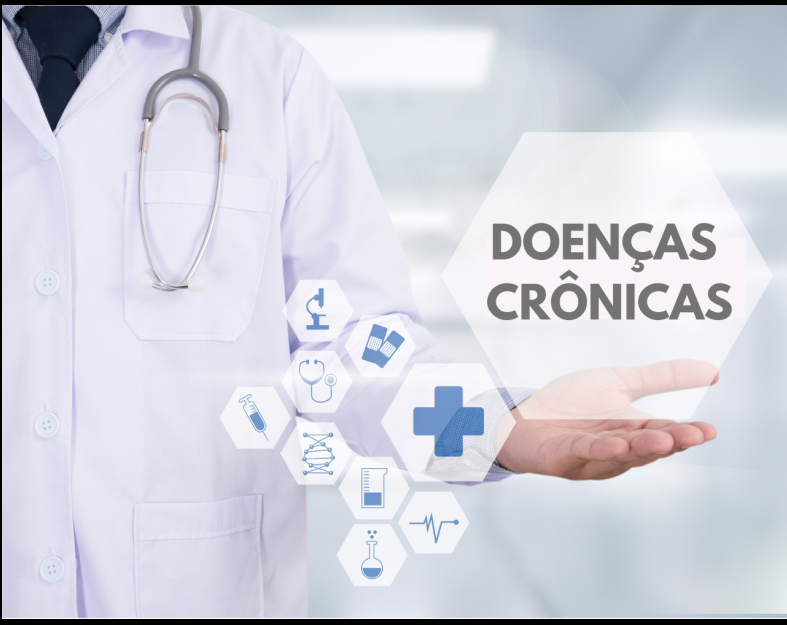


# 1. Contexto

Em um hospital, os administradores estão preocupados com o aumento do número de óbitos de pacientes devido a doenças crônicas. Eles desejam implementar medidas preventivas e intervenções precoces para melhorar os resultados dos pacientes.

# 2. Problema proposto

O hospital deseja identificar padrões e fatores de risco associados à mortalidade por doenças crônicas com base nos dados disponíveis, a fim de desenvolver estratégias de intervenção mais eficazes.

| # | Pergunta             | Descrição                                                                 |
|---|----------------------|---------------------------------------------------------------------------|
| 1 | Quem?                | Pacientes do hospital, equipe médica e administradores                    |
| 2 | O que?               | Identificar padrões e fatores de risco associados à mortalidade por doenças crônicas |
| 3 | Onde?                | Ambiente hospitalar                                                       |
| 4 | Quando?              | Análise contínua para monitorar padrões de mortalidade e ajustar intervenções conforme necessário |
| 5 | Por que?             | Desenvolver estratégias de intervenção eficazes para melhorar os resultados e qualidade de vida dos pacientes com doenças crônicas |

**********************************************************************************

# 3. Importação das Bibliotecas de Interesse

Começaremos nosso projeto, importanto todas as bilbiotecas necessárias, para a realização das fases iniciais de exploração, e transformação dos dados (Data Munging).

In [13]:
# Importando biblioteca, para ocultar Future Warnings.

import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Importando bibliotecas, para a manipulação e exploração dos conjuntos de dados.

import numpy as np

import pandas as pd


# train_test_split é utilizada para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split 
        
#RandomForestClassifier: Modelo para classificação eficaz em dados complexos, reduz risco de overfitting.
from sklearn.ensemble import RandomForestClassifier  

# accuracy_score: Mede a precisão das previsões do modelo.
from sklearn.metrics import accuracy_score

# LabelEncoder: Converte rótulos de texto em valores numéricos para análise.
from sklearn.preprocessing import LabelEncoder

# display, Markdown: Exibe conteúdo formatado em Markdown dentro de notebooks Jupyter.
from IPython.display import display, Markdown

from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

import seaborn as sns

import os


**********************************************************************************

# 4. Carregando Dados

Os dados Analizados são dados públicos do Estado de Minas Gerais 

In [14]:
# Obtendo o caminho para a área de trabalho do usuário atual com a substituição de barras para compatibilidade
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop').replace('\\', '/')

# Construir o caminho para o arquivo com barras corretas
file_path = os.path.join(desktop_path, 'saude', 'dados_obtos_cronicas.csv').replace('\\', '/')
try:
    dados_obto_doenca_cronica = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
    display(Markdown("<h3 style='color: darkred'>Arquivo .CVS lido com sucesso!!</h3>"))

except FileNotFoundError:
    display(Markdown("<h3 style='color: darkred'>Não foi possível carregar o arquivo!!</h3>"))


<h3 style='color: darkred'>Arquivo .CVS lido com sucesso!!</h3>

**********************************************************************************

## 4.1 Exibindo as primeiras linhas do dataset

In [15]:
dados_obto_doenca_cronica.head()

,dt_obito,dt_nascimento,nu_idade,sg_sexo,tp_raca_cor,tp_escolaridade,co_municipio_ibge_residencia,co_municipio_ibge_ocorrencia,co_cid_causa_basica,desc_cid_causa_basica,capitulo_cid_causa_basica,categoria_cid_causa_basica
0,01/01/2022,14/08/1969,52,Masculino,Branca,de 1 a 3 anos,Itatiaiuçu,Itatiaiuçu,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA
1,01/01/2022,23/08/1947,74,Masculino,Branca,de 8 a 11 anos,Nanuque,Nanuque,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
2,01/01/2022,19/07/1968,53,Masculino,Parda,de 4 a 7 anos,Ribeirão das Neves,Ribeirão das Neves,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
3,01/01/2022,28/03/1946,75,Feminino,Parda,Ignorado,Belo Horizonte,Belo Horizonte,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
4,01/01/2022,03/02/1950,71,Masculino,Branca,Nenhuma,Palma,Muriaé,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO


**********************************************************************************
# 5.Data Munging - Preparando dados para a análise exploratória


Etapa que visa melhorar a qualidade e a relevância dos dados para análise subsequente. 

**********************************************************************************
### 5.1 Destacando as informações que cada variável representa:


| Variável                       | Tipo    | Descrição                                      |
|--------------------------------|---------|------------------------------------------------|
| dt_obito                       | object  | Data de óbito                                  |
| dt_nascimento                  | object  | Data de nascimento do paciente                 |
| nu_idade                       | float64 | Idade do paciente em anos                      |
| sg_sexo                        | object  | Sexo do paciente (Masculino/Feminino)          |
| tp_raca_cor                    | object  | Raça/cor do paciente                           |
| tp_escolaridade                | object  | Escolaridade do paciente                       |
| co_municipio_ibge_residencia   | object  | Código IBGE do município de residência         |
| co_municipio_ibge_ocorrencia   | object  | Código IBGE do município de ocorrência do óbito|
| co_cid_causa_basica            | object  | Código CID da causa básica do óbito            |
| desc_cid_causa_basica          | object  | Descrição da causa básica do óbito             |
| capitulo_cid_causa_basica      | object  | Capítulo da CID da causa básica do óbito       |
| categoria_cid_causa_basica     | object  | Categoria da CID da causa básica do óbito      |


**********************************************************************************
### 5.2. Visão geral dos Dados

In [16]:
# Exibindo informações da quantidade de registros e colunas 

display(Markdown(f"<h3 style='color: darkblue'> Existem {dados_obto_doenca_cronica.shape[0]} observações e {dados_obto_doenca_cronica.shape[1]} colunas no DataSet: "))

<h3 style='color: darkblue'> Existem 75597 observações e 12 colunas no DataSet: 

**********************************************************************************
### 5.3. Análise de dados faltantes



In [17]:
# Calcula o total e a porcentagem de dados faltantes por coluna

total_faltantes = dados_obto_doenca_cronica.isnull().sum()
percentual_faltantes = (dados_obto_doenca_cronica.isnull().mean() * 100)

# Criar um DataFrame para a tabela resumida

tabela_resumo_faltantes = pd.DataFrame({
    'Coluna': total_faltantes.index,
    'Dados Faltantes': total_faltantes.values,
    'Percentual (%)': percentual_faltantes.values
})

# Ordenar a tabela pelo número de dados faltantes

tabela_resumo_faltantes = tabela_resumo_faltantes.sort_values(by='Dados Faltantes', ascending=False)

display(Markdown("<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>"))

# Exibi a tabela resumida

print(tabela_resumo_faltantes)



<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>

                          Coluna  Dados Faltantes  Percentual (%)
0                       dt_obito                0             0.0
1                  dt_nascimento                0             0.0
2                       nu_idade                0             0.0
3                        sg_sexo                0             0.0
4                    tp_raca_cor                0             0.0
5                tp_escolaridade                0             0.0
6   co_municipio_ibge_residencia                0             0.0
7   co_municipio_ibge_ocorrencia                0             0.0
8            co_cid_causa_basica                0             0.0
9          desc_cid_causa_basica                0             0.0
10     capitulo_cid_causa_basica                0             0.0
11    categoria_cid_causa_basica                0             0.0


**********************************************************************************
### 5.4. Verifica dados duplicados


In [18]:

# Verificando o número de registros duplicados.

dados_obto_doenca_cronica.duplicated().sum()

0

****************************************************************************
### 5.4 Contabilizando o número de valores únicos em cada variável

In [19]:
# Calculando valores únicos e classificando em ordem crescente

calc_dados_unicos = dados_obto_doenca_cronica.nunique().sort_values() 

# Determinando o tipo de dado de cada uma das variáveis do dataset.

calc_dados_unicos = pd.DataFrame(calc_dados_unicos.values, index = calc_dados_unicos.index, columns = ['Valor_unico'])

# Atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.

calc_dados_unicos['Tipo'] = dados_obto_doenca_cronica.dtypes

# Exibindo Dataframe.

calc_dados_unicos

,Valor_unico,Tipo
sg_sexo,2,object
capitulo_cid_causa_basica,4,object
tp_raca_cor,5,object
tp_escolaridade,6,object
nu_idade,114,int64
categoria_cid_causa_basica,194,object
dt_obito,365,object
desc_cid_causa_basica,736,object
co_cid_causa_basica,764,object
co_municipio_ibge_ocorrencia,840,object


### 5.5. Ajuste no Tipo de Dados das Variáveis para proseguimento das análises


In [20]:

dados_obto_doenca_cronica['dt_obito'] = pd.to_datetime(dados_obto_doenca_cronica['dt_obito'], format='%d/%m/%Y')
dados_obto_doenca_cronica['dt_nascimento'] = pd.to_datetime(dados_obto_doenca_cronica['dt_nascimento'], format='%d/%m/%Y')

dados_obto_doenca_cronica['sg_sexo'] = dados_obto_doenca_cronica['sg_sexo'].astype('category')
dados_obto_doenca_cronica['tp_raca_cor'] = dados_obto_doenca_cronica['tp_raca_cor'].astype('category')
dados_obto_doenca_cronica['tp_escolaridade'] = dados_obto_doenca_cronica['tp_escolaridade'].astype('category')

dados_obto_doenca_cronica['nu_idade'] = dados_obto_doenca_cronica['nu_idade'].astype('int')

# apresenta a modificação
display(Markdown("<h3 style='color: darkblue'>Variavéis Após Modificações de Tipo de Dados</h3>"))
dados_obto_doenca_cronica.dtypes


<h3 style='color: darkblue'>Variavéis Após Modificações de Tipo de Dados</h3>

dt_obito                        datetime64[ns]
dt_nascimento                   datetime64[ns]
nu_idade                                 int32
sg_sexo                               category
tp_raca_cor                           category
tp_escolaridade                       category
co_municipio_ibge_residencia            object
co_municipio_ibge_ocorrencia            object
co_cid_causa_basica                     object
desc_cid_causa_basica                   object
capitulo_cid_causa_basica               object
categoria_cid_causa_basica              object
dtype: object

### 5.6 Apresenta gráfico com Distribuição de Idade dos Pacientes

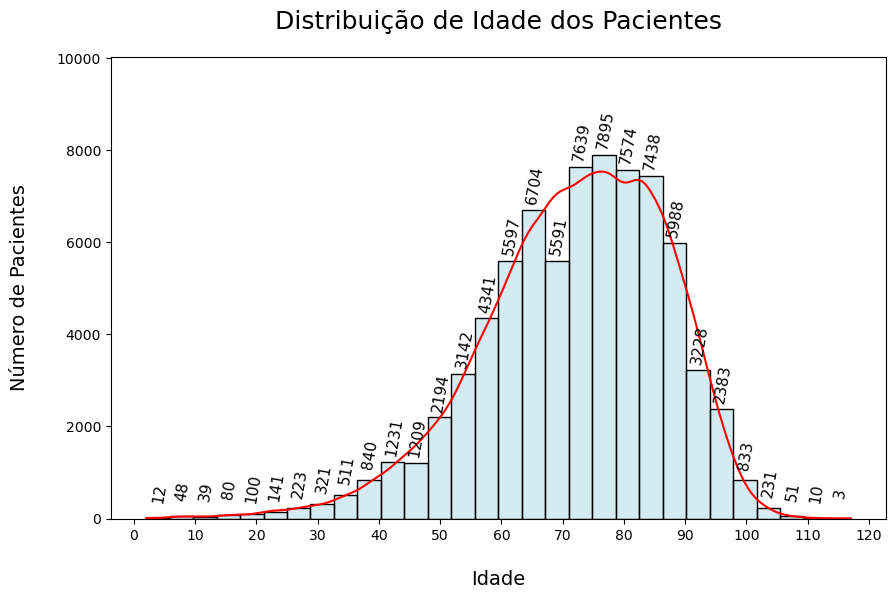

In [120]:
#******************************************************************************
# gráfico Distribuição de Idade dos Pacientes
#

# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))

# criando o histograma
histograma = sns.histplot(dados_obto_doenca_cronica['nu_idade'], kde=True, bins=30, color='lightblue')

# configurando a linha do KDE para ser vermelha
kde_color = 'red'
for l in histograma.lines:
    l.set_color(kde_color)

# Ajustando o título e os rótulos dos eixos com espaçamento adicional para o título
print("\n")
plt.title('Distribuição de Idade dos Pacientes', fontsize=18, pad=20)   #pad define valor para espaçamento
plt.xlabel('Idade', fontsize=14, labelpad=20)
plt.ylabel('Número de Pacientes', fontsize=14, labelpad=20)
           
# Definindo os valores do eixo x
valores_x = range(0, 121, 10)  # de 0 a 120 com intervalo de 10
plt.xticks(valores_x)

# apresentar os valores acima das barras com uma ligeira rotação e deslocamento vertical aumentado
for p in histograma.patches:
    histograma.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=11, color='black', xytext=(1, 18), 
                 textcoords='offset points', rotation=80)
    
# ajustamos os limites do eixo y para aumentar o espaço acima da barra mais alta
max_height = max([p.get_height() for p in histograma.patches])
histograma.set_ylim(0, max_height * 1.27)  # valor para aumentar o limite superior para criar mais espaço

# Mostrando o gráfico
plt.show()



### 5.7. Gráfico da Análise de Mortalidade por Sexo

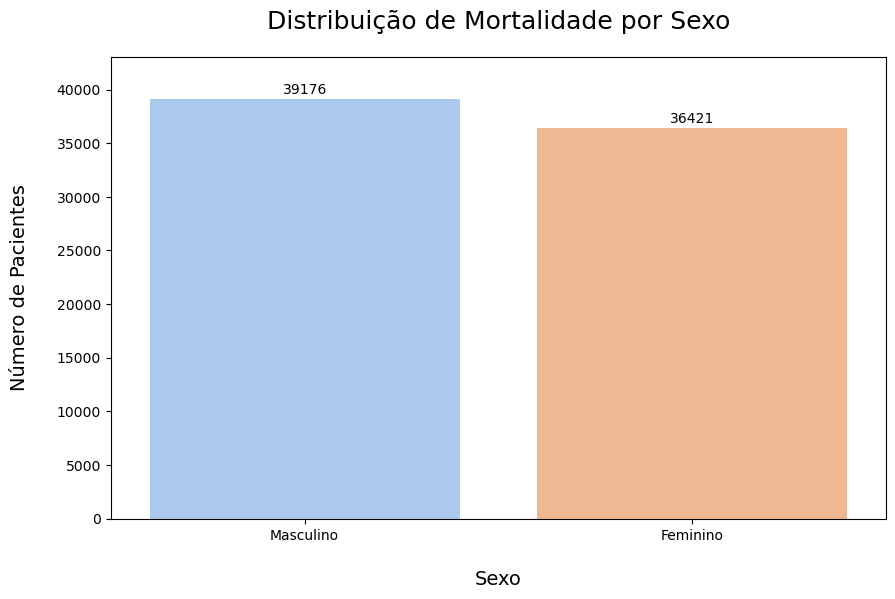

In [116]:

# Reordenando os dados para garantir que a barra masculino apareça primeiro
dados_obto_doenca_cronica['sg_sexo'] = pd.Categorical(dados_obto_doenca_cronica['sg_sexo'], categories=['Masculino', 'Feminino'], ordered=True)

# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))

print()

sns.countplot(x='sg_sexo', data=dados_obto_doenca_cronica, palette='pastel')
plt.title('Distribuição de Mortalidade por Sexo', fontsize=18, pad=20)   # pad define valor para espaçamento
plt.xlabel('Sexo', fontsize=14, labelpad=20)                             # eixo x
plt.ylabel('Número de Pacientes', fontsize=14, labelpad=20)              # eixo y

# Adicionando os valores no topo das barras
for index, value in enumerate(dados_obto_doenca_cronica['sg_sexo'].value_counts()):
    plt.text(index, value+1500, str(value), ha='center', va='top')

# Ajustando os limites do eixo Y para aumentar o espaço acima da barra mais alta
max_height = max(dados_obto_doenca_cronica['sg_sexo'].value_counts())
plt.ylim(0, max_height * 1.1)  # Aumenta o limite superior para criar mais espaço    
    
plt.show()
print()


### Análise de Município com Maior Número de Óbito 

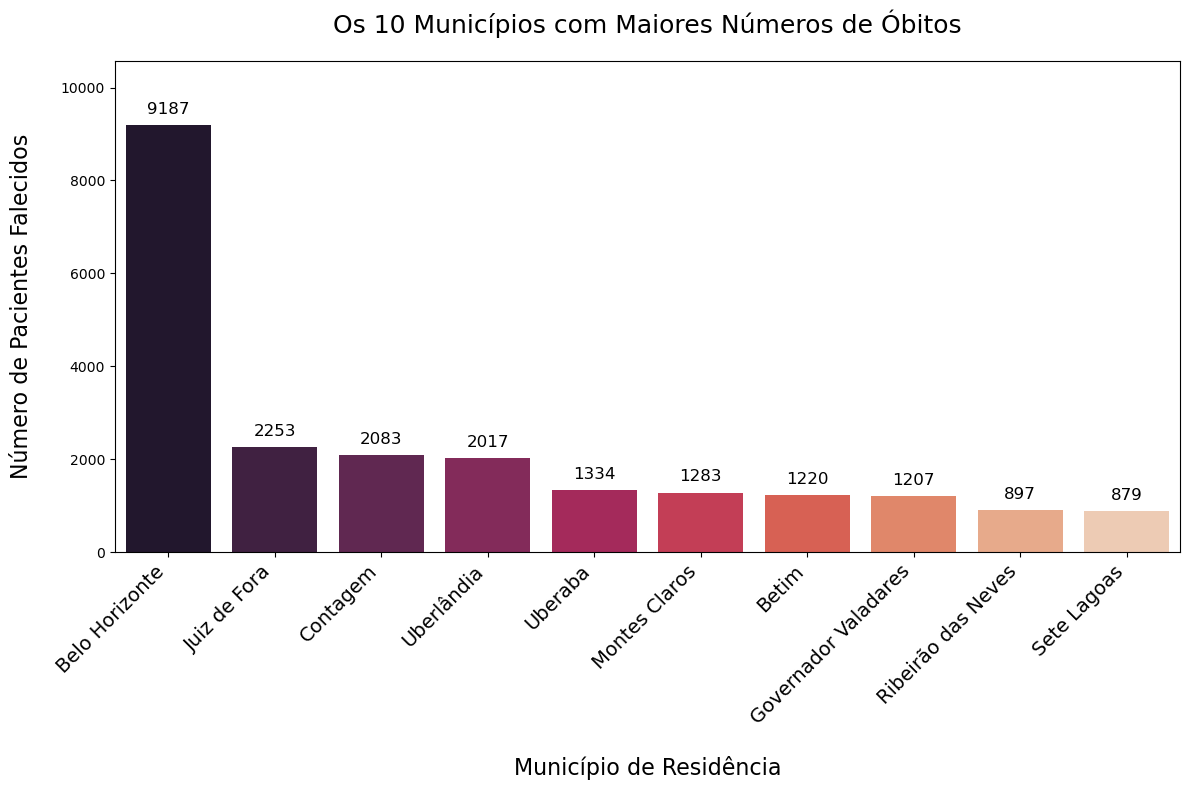

In [96]:

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Limitando o número de municípios exibidos no gráfico para os top 10
top_municipios = dados_obto_doenca_cronica['co_municipio_ibge_residencia'].value_counts().nlargest(10)

print()

# Plotando o gráfico de contagem com os 10 Municípios com Maiores Números de Óbitos
sns.barplot(x=top_municipios.index, y=top_municipios.values, palette='rocket')
plt.title('Os 10 Municípios com Maiores Números de Óbitos', fontsize=18, pad=20)
plt.xlabel('Município de Residência', fontsize=16, labelpad=20)
plt.ylabel('Número de Pacientes Falecidos', fontsize=16, labelpad=20)

# Definindo os rótulos do eixo x como os nomes dos municípios
plt.xticks(range(len(top_municipios.index)), top_municipios.index, rotation=45, ha='right', fontsize=14)

# Adicionando os valores no topo das barras
for index, value in enumerate(top_municipios.values):
    plt.text(index, value + 500, str(value), ha='center', va='top', fontsize=12)

# Ajustando os limites do eixo Y para aumentar o espaço acima da barra mais alta
max_height = max(dados_obto_doenca_cronica['co_municipio_ibge_residencia'].value_counts().values[:10])
plt.ylim(0, max_height * 1.15)  # Aumenta o limite superior para criar mais espaço
    
plt.tight_layout()
plt.show()
print()

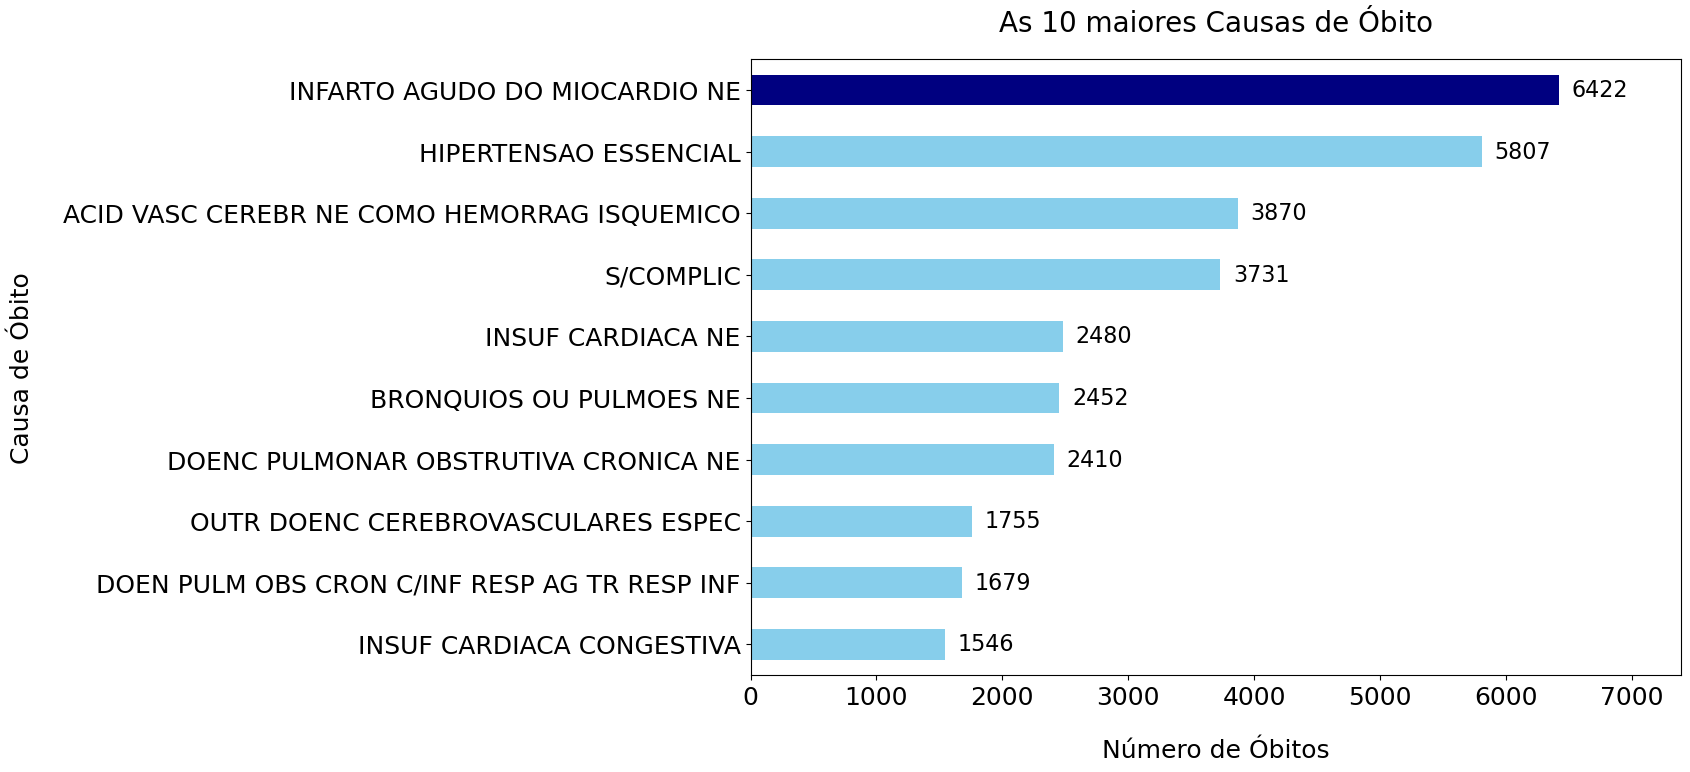

In [111]:
# Determinando as top N causas de morte
N = 10
top_causas = dados_obto_doenca_cronica['desc_cid_causa_basica'].value_counts().nlargest(N)

# Definindo cores para as barras
colors = ['skyblue' if c != top_causas.idxmax() else 'navy' for c in top_causas.index]

print()

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
ax = top_causas.plot(kind='barh', color=colors)
plt.title(f'As {N} maiores Causas de Óbito', fontsize=20, pad=20)
plt.xlabel('Número de Óbitos', fontsize=18, labelpad=21)
plt.ylabel('Causa de Óbito', fontsize=18, labelpad=21)
plt.gca().invert_yaxis()  # Inverte a ordem para mostrar a maior causa de morte no topo

# Adicionando os valores no topo das barras
for index, value in enumerate(top_causas):
    plt.text(value+100, index, str(value), ha='left', va='center', fontsize=16)

    
# Ajustando o tamanho da fonte para os rótulos no eixo Y (causas de óbito)
plt.yticks(fontsize=18)

# Ajustando o tamanho da fonte para os valores do eixo X (número de óbitos)
plt.xticks(fontsize=18)


# Ajustando os limites do eixo X para aumentar o espaço à direita da barra mais longa
max_width = max(dados_obto_doenca_cronica['desc_cid_causa_basica'].value_counts().nlargest(N))
plt.xlim(0, max_width * 1.15)  # Aumenta o limite direito para criar mais espaço



plt.show()
